In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pyam
import seaborn
from scipy.optimize import fsolve, root, least_squares
from sklearn.neighbors import NearestNeighbors
import sklearn.decomposition
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import sys

<IPython.core.display.Javascript object>

In [2]:
sys.path.insert(0, '..')
import scripts.utils
import scripts.generate_systematic_paths

In [3]:
version_str = "v5"
fair_dir = f"../output/{version_str}/fair/"
output_dir = f"../output/{version_str}/"
date_str = "2022-03-15"
temps = pd.read_csv("{}fair_output_quantiles_{}_{}.csv".format(fair_dir, date_str, version_str))
fair_df = pd.read_csv('{}fair_output_raw_{}_{}.csv'.format(fair_dir, date_str, version_str), index_col=0)
fair_df

,scenario,1765,1766,1767,1768,1769,1770,1771,1772,1773,...,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300
0,scen_2030fact0.12_nz2040_ov-10000_meth0.1,0.002751,0.005241,0.007940,0.012981,0.018950,0.025513,0.029475,0.030094,0.030464,...,0.252816,0.250176,0.247540,0.244910,0.242285,0.239665,0.237050,0.234440,0.231835,0.229236
1,scen_2030fact0.12_nz2040_ov-10000_meth0.1,0.003864,0.007122,0.010898,0.020395,0.031454,0.043210,0.047838,0.043892,0.041129,...,0.241531,0.237814,0.234108,0.230412,0.226728,0.223054,0.219392,0.215740,0.212100,0.208471
2,scen_2030fact0.12_nz2040_ov-10000_meth0.1,0.015027,0.025776,0.035114,0.046443,0.057942,0.069351,0.076312,0.077298,0.078463,...,0.351020,0.347929,0.344846,0.341769,0.338698,0.335635,0.332578,0.329528,0.326485,0.323449
3,scen_2030fact0.12_nz2040_ov-10000_meth0.1,0.003456,0.005529,0.007669,0.012386,0.017598,0.022956,0.024841,0.023868,0.022721,...,0.336686,0.333530,0.330380,0.327237,0.324100,0.320971,0.317848,0.314733,0.311624,0.308523
4,scen_2030fact0.12_nz2040_ov-10000_meth0.1,0.005983,0.010959,0.015759,0.022375,0.029606,0.037201,0.042308,0.042533,0.043916,...,0.232094,0.230138,0.228189,0.226246,0.224311,0.222383,0.220462,0.218548,0.216641,0.214741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,scen_2030fact1.32_nz2200_ov0_meth0.9,-0.002594,-0.003396,-0.002763,0.003357,0.011730,0.021526,0.026191,0.026982,0.025351,...,3.123520,3.123723,3.123927,3.124133,3.124340,3.124548,3.124757,3.124967,3.125178,3.125390
35996,scen_2030fact1.32_nz2200_ov0_meth0.9,0.002257,0.004585,0.007460,0.014016,0.022098,0.031179,0.036468,0.038749,0.039038,...,4.245763,4.247253,4.248727,4.250186,4.251629,4.253058,4.254471,4.255869,4.257253,4.258622
35997,scen_2030fact1.32_nz2200_ov0_meth0.9,0.005314,0.009809,0.014304,0.021737,0.030238,0.039397,0.044933,0.045437,0.045969,...,5.468724,5.471089,5.473428,5.475741,5.478030,5.480293,5.482531,5.484745,5.486934,5.489100
35998,scen_2030fact1.32_nz2200_ov0_meth0.9,0.001698,0.003474,0.005696,0.010695,0.016892,0.023899,0.028145,0.029651,0.030138,...,4.288641,4.292456,4.296250,4.300022,4.303772,4.307502,4.311209,4.314896,4.318562,4.322206


In [4]:
temps_py = pyam.IamDataFrame(temps)
temps_py.data

,model,scenario,region,variable,unit,year,climate_model,quantile,value
0,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.1,World,Surface Temperature,K,2010,FaIRv1.6.4,0.10,0.931664
1,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.1,World,Surface Temperature,K,2010,FaIRv1.6.4,0.33,0.948613
2,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.1,World,Surface Temperature,K,2010,FaIRv1.6.4,0.50,0.958960
3,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.1,World,Surface Temperature,K,2010,FaIRv1.6.4,0.66,0.970343
4,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.1,World,Surface Temperature,K,2010,FaIRv1.6.4,0.90,0.995397
...,...,...,...,...,...,...,...,...,...
2182495,NameVanished,scen_2030fact1.32_nz2200_ov0_meth0.9,World,Surface Temperature,K,2300,FaIRv1.6.4,0.10,2.904312
2182496,NameVanished,scen_2030fact1.32_nz2200_ov0_meth0.9,World,Surface Temperature,K,2300,FaIRv1.6.4,0.33,3.604036
2182497,NameVanished,scen_2030fact1.32_nz2200_ov0_meth0.9,World,Surface Temperature,K,2300,FaIRv1.6.4,0.50,3.920766
2182498,NameVanished,scen_2030fact1.32_nz2200_ov0_meth0.9,World,Surface Temperature,K,2300,FaIRv1.6.4,0.66,4.118661


pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.plotting - INFO: >=13 labels, not applying legend
pyam.plotting - INFO: >=13 labels, not applying legend


<AxesSubplot:title={'center':'model: NameVanished - region: World - variable: Surface Temperature - climate_model: FaIRv1.6.4 - quantile: 0.66'}, xlabel='Year', ylabel='K'>

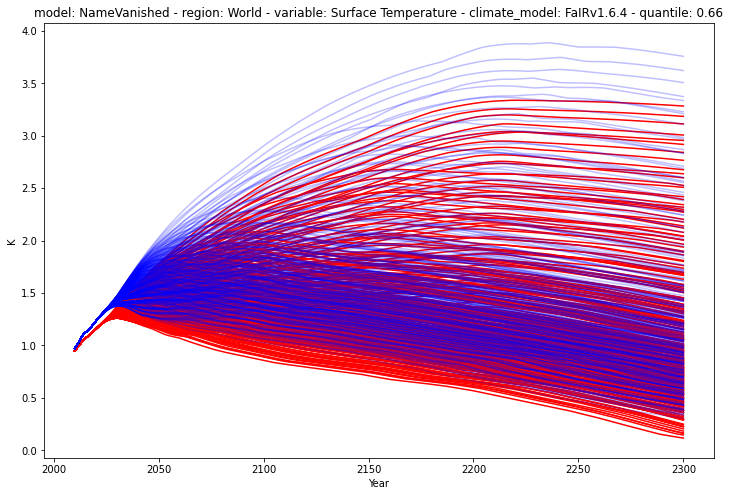

In [5]:
plt.figure(figsize=(12, 8))
ax=plt.subplot()
temps_py.filter(quantile=0.33, scenario="*10000*").plot(ax=ax, color="r")
temps_py.filter(quantile=0.66, scenario="*10000*").plot(ax=ax, color="b", alpha=0.25)

In [6]:
temps

,climate_model,model,region,scenario,unit,variable,quantile,2010,2011,2012,...,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300
0,FaIRv1.6.4,NameVanished,World,scen_2030fact0.12_nz2040_ov-10000_meth0.1,K,Surface Temperature,0.1,0.931664,0.949297,0.967368,...,0.099868,0.096647,0.093437,0.090239,0.087053,0.083879,0.080717,0.077567,0.074429,0.071302
1,FaIRv1.6.4,NameVanished,World,scen_2030fact0.12_nz2040_ov-10000_meth0.25,K,Surface Temperature,0.1,0.931664,0.949297,0.967368,...,0.135194,0.132734,0.130283,0.127841,0.125408,0.122984,0.120374,0.117310,0.114259,0.111219
2,FaIRv1.6.4,NameVanished,World,scen_2030fact0.12_nz2040_ov-10000_meth0.5,K,Surface Temperature,0.1,0.931664,0.949297,0.967368,...,0.175823,0.173365,0.170916,0.168477,0.166046,0.163624,0.161211,0.158807,0.156412,0.154026
3,FaIRv1.6.4,NameVanished,World,scen_2030fact0.12_nz2040_ov-10000_meth0.75,K,Surface Temperature,0.1,0.931664,0.949297,0.967368,...,0.247033,0.244419,0.241771,0.238736,0.235823,0.233404,0.230993,0.228591,0.226198,0.223814
4,FaIRv1.6.4,NameVanished,World,scen_2030fact0.12_nz2040_ov-10000_meth0.9,K,Surface Temperature,0.1,0.931664,0.949297,0.967368,...,0.367415,0.364812,0.362219,0.359636,0.357062,0.354498,0.351943,0.349399,0.346864,0.344338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,FaIRv1.6.4,NameVanished,World,scen_2030fact1.32_nz2200_ov0_meth0.1,K,Surface Temperature,0.9,0.995397,1.026791,1.063653,...,4.089028,4.092328,4.095611,4.098876,4.102123,4.105352,4.108563,4.111757,4.114933,4.118092
7496,FaIRv1.6.4,NameVanished,World,scen_2030fact1.32_nz2200_ov0_meth0.25,K,Surface Temperature,0.9,0.995397,1.026791,1.063653,...,4.206433,4.209905,4.213358,4.216792,4.220209,4.223607,4.226986,4.230348,4.233691,4.237016
7497,FaIRv1.6.4,NameVanished,World,scen_2030fact1.32_nz2200_ov0_meth0.5,K,Surface Temperature,0.9,0.995397,1.026791,1.063653,...,4.345389,4.349054,4.352701,4.356328,4.359936,4.363525,4.367095,4.370647,4.374179,4.377693
7498,FaIRv1.6.4,NameVanished,World,scen_2030fact1.32_nz2200_ov0_meth0.75,K,Surface Temperature,0.9,0.995397,1.026791,1.063653,...,4.438831,4.442622,4.446392,4.450143,4.453875,4.457587,4.461280,4.464954,4.468609,4.472244


In [7]:
temps_90 = pyam.IamDataFrame(temps).filter(quantile=0.9).timeseries()
temps_50 = pyam.IamDataFrame(temps).filter(quantile=0.5).timeseries()
temps_10 = pyam.IamDataFrame(temps).filter(quantile=0.1).timeseries()
temps_33 = pyam.IamDataFrame(temps).filter(quantile=0.33).timeseries()
temps_66 = pyam.IamDataFrame(temps).filter(quantile=0.66).timeseries()
temps_90 = temps_90.reset_index(drop=True)
temps_50 = temps_50.reset_index(drop=True)
temps_10 = temps_10.reset_index(drop=True)
temps_33 = temps_33.reset_index(drop=True)
temps_66 = temps_66.reset_index(drop=True)
quantile_range = [0.10, 0.33, 0.50, 0.66, 0.90, "all"]
decomposers2 = {}
decomposers3 = {}
decomposers4 = {}
decomposers5 = {}
temp_data = {
    0.10: temps_10, 0.33: temps_33, 0.50: temps_50, 0.90:temps_90, 
    0.66: temps_66, "all": temps_py.timeseries().reset_index(drop=True)
}
for i in quantile_range:
    decomposers2[i] = sklearn.decomposition.PCA(2).fit(temp_data[i])
    decomposers3[i] = sklearn.decomposition.PCA(3).fit(temp_data[i])
    decomposers4[i] = sklearn.decomposition.PCA(4).fit(temp_data[i])
    decomposers5[i] = sklearn.decomposition.PCA(5).fit(temp_data[i])

In [8]:
pcacols = ["PCA1", "PCA2", "PCA3", "PCA4", "PCA5"]
# Switch between on and off to study the impact of considering all quantiles
if (False):
    pcadf = pd.DataFrame(
        decomposers5[0.5].transform(temps_py.filter(quantile=0.5).timeseries()), 
        columns=pcacols,
        index=temps_py.filter(quantile=0.5).timeseries().index
    ).reset_index()
else:
    pcadf = pd.DataFrame(
        decomposers5["all"].transform(temps_py.timeseries()), 
        columns=pcacols,
        index=temps_py.timeseries().index
    ).reset_index()

In [9]:
def decode_scen(df):
    df["factor2030"] = [float(x[1][:4]) for x in df["scenario"].str.split("2030fact")]
    df["nzdate"] = [int(x[1][:4]) for x in df["scenario"].str.split("_nz")]
    df["overshoot"] = [float(x[3][2:]) for x in df["scenario"].str.split("_")]
    df["methane"] = [float(x[4][4:]) for x in df["scenario"].str.split("_")]
    # The numerical stability of calculations is higher when variables are all of order 1
    df["nzreduced"] = df["nzdate"] / 100 - 20
    df["overshootreduced"] = df["overshoot"]/10000
    return df
pcadf = decode_scen(pcadf)
pcadf

,model,scenario,region,variable,unit,climate_model,quantile,PCA1,PCA2,PCA3,PCA4,PCA5,factor2030,nzdate,overshoot,methane,nzreduced,overshootreduced
0,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.1,World,Surface Temperature,K,FaIRv1.6.4,0.10,-17.613756,-0.692742,0.560699,-0.131485,-0.106258,0.12,2040,-10000.0,0.1,0.4,-1.0
1,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.1,World,Surface Temperature,K,FaIRv1.6.4,0.33,-15.665608,0.053390,0.533702,0.409586,0.232727,0.12,2040,-10000.0,0.1,0.4,-1.0
2,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.1,World,Surface Temperature,K,FaIRv1.6.4,0.50,-14.408059,0.538776,0.423014,0.237882,-0.143378,0.12,2040,-10000.0,0.1,0.4,-1.0
3,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.1,World,Surface Temperature,K,FaIRv1.6.4,0.66,-13.544358,0.760316,0.316464,0.405535,-0.234967,0.12,2040,-10000.0,0.1,0.4,-1.0
4,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.1,World,Surface Temperature,K,FaIRv1.6.4,0.90,-12.037192,1.309656,-0.152482,0.587764,-0.387069,0.12,2040,-10000.0,0.1,0.4,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,NameVanished,scen_2030fact1.32_nz2200_ov0_meth0.9,World,Surface Temperature,K,FaIRv1.6.4,0.10,15.726359,-2.154987,0.636658,-0.418351,0.144734,1.32,2200,0.0,0.9,2.0,0.0
7496,NameVanished,scen_2030fact1.32_nz2200_ov0_meth0.9,World,Surface Temperature,K,FaIRv1.6.4,0.33,24.099507,-2.177503,0.480495,-0.361960,-0.025365,1.32,2200,0.0,0.9,2.0,0.0
7497,NameVanished,scen_2030fact1.32_nz2200_ov0_meth0.9,World,Surface Temperature,K,FaIRv1.6.4,0.50,28.910245,-2.367714,0.662772,0.216050,0.457586,1.32,2200,0.0,0.9,2.0,0.0
7498,NameVanished,scen_2030fact1.32_nz2200_ov0_meth0.9,World,Surface Temperature,K,FaIRv1.6.4,0.66,31.476092,-1.472789,0.396423,-0.207354,-0.014327,1.32,2200,0.0,0.9,2.0,0.0


In [10]:
functional_cols = ["factor2030", "nzreduced", "overshootreduced", "methane"]
pcadf = pcadf.set_index("scenario", drop=True).loc[:, ["quantile"] + functional_cols + pcacols]
pcadf

,quantile,factor2030,nzreduced,overshootreduced,methane,PCA1,PCA2,PCA3,PCA4,PCA5
scenario,,,,,,,,,,
scen_2030fact0.12_nz2040_ov-10000_meth0.1,0.10,0.12,0.4,-1.0,0.1,-17.613756,-0.692742,0.560699,-0.131485,-0.106258
scen_2030fact0.12_nz2040_ov-10000_meth0.1,0.33,0.12,0.4,-1.0,0.1,-15.665608,0.053390,0.533702,0.409586,0.232727
scen_2030fact0.12_nz2040_ov-10000_meth0.1,0.50,0.12,0.4,-1.0,0.1,-14.408059,0.538776,0.423014,0.237882,-0.143378
scen_2030fact0.12_nz2040_ov-10000_meth0.1,0.66,0.12,0.4,-1.0,0.1,-13.544358,0.760316,0.316464,0.405535,-0.234967
scen_2030fact0.12_nz2040_ov-10000_meth0.1,0.90,0.12,0.4,-1.0,0.1,-12.037192,1.309656,-0.152482,0.587764,-0.387069
...,...,...,...,...,...,...,...,...,...,...
scen_2030fact1.32_nz2200_ov0_meth0.9,0.10,1.32,2.0,0.0,0.9,15.726359,-2.154987,0.636658,-0.418351,0.144734
scen_2030fact1.32_nz2200_ov0_meth0.9,0.33,1.32,2.0,0.0,0.9,24.099507,-2.177503,0.480495,-0.361960,-0.025365
scen_2030fact1.32_nz2200_ov0_meth0.9,0.50,1.32,2.0,0.0,0.9,28.910245,-2.367714,0.662772,0.216050,0.457586


In [11]:
pca_train, pca_test, pca_res_train, pca_res_test = train_test_split(
    pcadf.loc[:, pcacols + ["quantile"]], pcadf.loc[:, functional_cols], test_size = 0.2, random_state = 4
)

In [12]:
pca_res_train

,factor2030,nzreduced,overshootreduced,methane
scenario,,,,
scen_2030fact0.12_nz2150_ov-10000_meth0.1,0.12,1.5,-1.00,0.10
scen_2030fact0.72_nz2040_ov0_meth0.5,0.72,0.4,0.00,0.50
scen_2030fact1.12_nz2080_ov0_meth0.5,1.12,0.8,0.00,0.50
scen_2030fact1.12_nz2080_ov-2500_meth0.1,1.12,0.8,-0.25,0.10
scen_2030fact0.72_nz2150_ov-5000_meth0.75,0.72,1.5,-0.50,0.75
...,...,...,...,...
scen_2030fact1.12_nz2090_ov-10000_meth0.75,1.12,0.9,-1.00,0.75
scen_2030fact0.12_nz2090_ov-7500_meth0.25,0.12,0.9,-0.75,0.25
scen_2030fact0.52_nz2050_ov0_meth0.5,0.52,0.5,0.00,0.50


# Attempt to map across different quantiles

In [13]:
dif_quant_test = pca_test.copy()
dif_quant_test["quantile"] = 0.5

In [14]:
pca_res_test

,factor2030,nzreduced,overshootreduced,methane
scenario,,,,
scen_2030fact0.52_nz2040_ov-5000_meth0.75,0.52,0.4,-0.50,0.75
scen_2030fact0.32_nz2090_ov-7500_meth0.5,0.32,0.9,-0.75,0.50
scen_2030fact0.52_nz2080_ov0_meth0.1,0.52,0.8,0.00,0.10
scen_2030fact0.92_nz2070_ov0_meth0.75,0.92,0.7,0.00,0.75
scen_2030fact1.12_nz2200_ov-2500_meth0.75,1.12,2.0,-0.25,0.75
...,...,...,...,...
scen_2030fact0.52_nz2070_ov-10000_meth0.75,0.52,0.7,-1.00,0.75
scen_2030fact0.32_nz2040_ov-7500_meth0.1,0.32,0.4,-0.75,0.10
scen_2030fact1.32_nz2060_ov-2500_meth0.5,1.32,0.6,-0.25,0.50


In [15]:
# Compare correct value
regression = linear_model.LinearRegression()
poly_model = regression.fit(pca_train, pca_res_train)
score = poly_model.score(pca_test, pca_res_test)
score

0.6589027677192967

In [16]:
# With polynomial version of correct value
poly = PolynomialFeatures(degree=6)
poly_train = poly.fit_transform(pca_train)
poly_test = poly.fit_transform(pca_test)

In [17]:
poly_model = regression.fit(poly_train, pca_res_train)
score = poly_model.score(poly_test, pca_res_test)
predicted = poly_model.predict(poly_test)
score

0.9288790541973562

In [18]:
# Much more accurate! Now compare to the different quantile values (no objective answer)
wrong_quant_pred = poly_model.predict(poly.fit_transform(dif_quant_test))

[array([[ 1.        , -0.04347309],
        [-0.04347309,  1.        ]]),
 array([[1.        , 0.14898314],
        [0.14898314, 1.        ]]),
 array([[ 1.       , -0.1287598],
        [-0.1287598,  1.       ]]),
 array([[1.        , 0.07016441],
        [0.07016441, 1.        ]])]

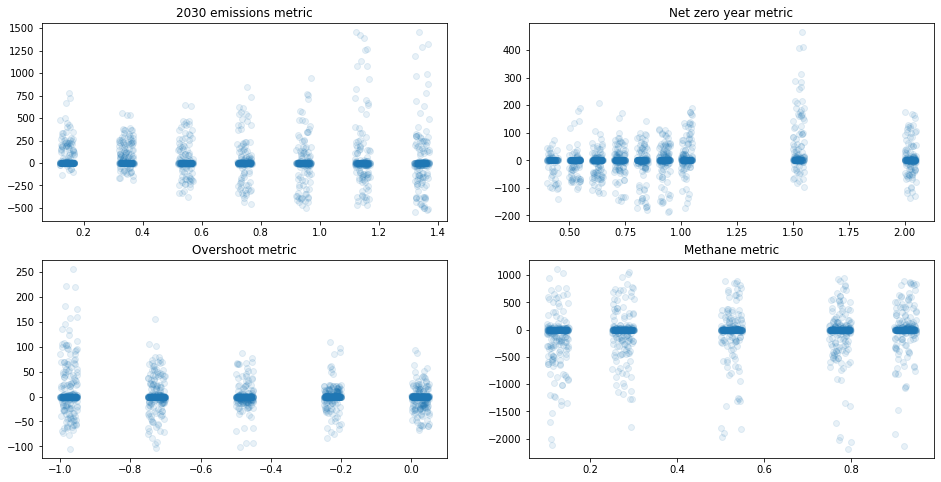

In [19]:
plt.figure(figsize=(16, 8))
corcoefsq5 = []
titles = ["2030 emissions metric", "Net zero year metric", "Overshoot metric", "Methane metric"]
for i in range(4):
    ax=plt.subplot(2, 2, i+1)
    plt.scatter(pca_res_test.iloc[:, i]+0.05*np.random.rand(len(pca_res_test)), wrong_quant_pred [:, i], alpha=0.1)
    plt.title(titles[i])
    corcoefsq5.append(np.corrcoef(pca_res_test.iloc[:, i], wrong_quant_pred [:, i]))
corcoefsq5

In [20]:
def calc_wrong_fraction(npa):
    # Encode link between column index and max/min reasonable values
    limits = {0: [-0.1, 2], 1: [0.25, 3], 2: [-2, 0.1], 3: [0, 1]}
    wrong_fraction = pd.Series(index=range(npa.shape[1]), data = np.nan)
    for i in range(npa.shape[1]):
        wrong_fraction[i] = sum(
            (npa[:, i] > limits[i][1]) | (npa[:, i] < limits[i][0])
        ) / len(npa)
    all_wrong_fraction = sum(
        (npa[:, 0] > limits[0][1]) | (npa[:, 0] < limits[0][0]) |
        (npa[:, 1] > limits[1][1]) | (npa[:, 1] < limits[1][0]) |
        (npa[:, 2] > limits[2][1]) | (npa[:, 2] < limits[2][0]) |
        (npa[:, 3] > limits[3][1]) | (npa[:, 3] < limits[3][0]) 
    ) / len(npa)
    return (all_wrong_fraction, wrong_fraction)

In [21]:
(all_wrong_fraction, wrong_fraction) = calc_wrong_fraction(wrong_quant_pred)
print(all_wrong_fraction)
print(wrong_fraction)

0.7773333333333333
0    0.681333
1    0.602667
2    0.568000
3    0.749333
dtype: float64


In [22]:
(all_wrong_fraction, wrong_fraction) = calc_wrong_fraction(predicted)
print(all_wrong_fraction)
print(wrong_fraction)

0.06
0    0.003333
1    0.001333
2    0.000000
3    0.056000
dtype: float64


## Attempt via resolution into PCA of the corresponding quantile
Unfortunately the accuracy of the single-quantile decomposition is poor

In [23]:
temp_train = {}
temp_test = {}
temp_res_train = {}
temp_res_test = {}
quantiles = [0.1, 0.33, 0.5, 0.66, 0.9]
for quantile in quantiles + ["all"]:
    if quantile != "all":
        temp_quant = decode_scen(temps.loc[temps["quantile"]==quantile,:].copy())
    else:
        temp_quant = decode_scen(temps)
    temp_train[quantile], temp_test[quantile], temp_res_train[quantile], temp_res_test[quantile] = train_test_split(
        temp_quant.loc[:, temp_quant.columns[6:-6]], 
        temp_quant.loc[:, functional_cols], test_size = 0.2, random_state = 4
    )

In [24]:
temp_train["all"]

,quantile,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300
875,0.10,0.931664,0.949297,0.967368,0.986894,1.006826,1.021978,1.034573,1.047526,1.061110,...,1.550128,1.548064,1.545998,1.543928,1.541855,1.539778,1.537699,1.535616,1.533530,1.531440
3485,0.50,0.958960,0.982262,1.013705,1.048521,1.081387,1.102848,1.121263,1.136685,1.153323,...,0.887898,0.886277,0.884653,0.883027,0.881398,0.879767,0.878133,0.876497,0.874859,0.873218
5986,0.66,0.970343,1.000500,1.032204,1.068488,1.101086,1.121052,1.135753,1.157182,1.179103,...,3.530507,3.529364,3.528214,3.527056,3.525890,3.524717,3.523536,3.522347,3.521151,3.519947
5900,0.66,0.970343,1.000500,1.032204,1.068488,1.101086,1.121052,1.135737,1.157108,1.178912,...,1.360168,1.355836,1.352522,1.349198,1.345864,1.342521,1.339167,1.335804,1.332431,1.329049
4315,0.50,0.958960,0.982262,1.013705,1.048521,1.081387,1.102848,1.121263,1.136685,1.153323,...,0.873940,0.870874,0.867805,0.864732,0.861656,0.858576,0.855493,0.852407,0.849318,0.846225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6017,0.90,0.995397,1.026791,1.063653,1.104802,1.145201,1.174712,1.200457,1.226624,1.250830,...,0.785352,0.782634,0.779916,0.777198,0.774479,0.771760,0.769041,0.766322,0.763603,0.760884
709,0.10,0.931664,0.949297,0.967368,0.986894,1.006826,1.021978,1.034599,1.047646,1.061414,...,1.180848,1.180298,1.179746,1.179194,1.178640,1.178085,1.177529,1.176972,1.176414,1.175855
2487,0.33,0.948613,0.972286,0.996378,1.023090,1.048866,1.065719,1.081632,1.098093,1.115353,...,1.338647,1.336922,1.335193,1.333460,1.331723,1.329982,1.328237,1.326487,1.324734,1.322977
174,0.10,0.931664,0.949297,0.967368,0.986894,1.006826,1.021978,1.034599,1.047646,1.061414,...,1.301739,1.302287,1.302833,1.303377,1.303918,1.304458,1.304995,1.305529,1.306062,1.306593


In [25]:
quant_to_inv = 0.66
poly_2 = PolynomialFeatures(degree=2)
temp_to_train = decomposers5[quant_to_inv].transform(temp_train[quant_to_inv].iloc[:, 1:])
temp_to_train = np.c_[temp_to_train, temp_train[quant_to_inv].loc[:, "quantile"].values]

temp_to_test = decomposers5[quant_to_inv].transform(temp_test[quant_to_inv].iloc[:, 1:])
temp_to_test = np.c_[temp_to_test, temp_test[quant_to_inv].loc[:, "quantile"].values]
poly_model = regression.fit(
    poly_2.fit_transform(temp_to_train), temp_res_train[quant_to_inv]
)
score = poly_model.score(
    poly_2.fit_transform(temp_to_test), temp_res_test[quant_to_inv]
)
score

C:\Users\rlamboll\Anaconda3\envs\silicone-1\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\rlamboll\Anaconda3\envs\silicone-1\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.862267994170417

In [26]:
quant_to_inv = 0.5
temp_to_train = decomposers5[quant_to_inv].transform(temp_train[quant_to_inv].iloc[:, 1:])
temp_to_train = np.c_[temp_to_train, temp_train[quant_to_inv].loc[:, "quantile"].values]

temp_to_test = decomposers5[quant_to_inv].transform(temp_test[quant_to_inv].iloc[:, 1:])
temp_to_test = np.c_[temp_to_test, temp_test[quant_to_inv].loc[:, "quantile"].values]
poly_model = regression.fit(
    poly_2.fit_transform(temp_to_train), temp_res_train[quant_to_inv]
)
score = poly_model.score(
    poly_2.fit_transform(temp_to_test), temp_res_test[quant_to_inv]
)
score

C:\Users\rlamboll\Anaconda3\envs\silicone-1\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\rlamboll\Anaconda3\envs\silicone-1\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.7860356273959025

In [27]:
true_quant = 0.1
false_quant = quant_to_inv
assert true_quant != false_quant
wrong_quant_pcas = decomposers5[false_quant].transform(temp_test[true_quant].iloc[:, 1:])
wrong_quant_pcas = np.c_[wrong_quant_pcas, false_quant * np.ones((len(wrong_quant_pcas), 1))]
wrong_quant_results = poly_model.predict(poly_2.fit_transform(wrong_quant_pcas))

C:\Users\rlamboll\Anaconda3\envs\silicone-1\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


C:\Users\rlamboll\Anaconda3\envs\silicone-1\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Text(0, 0.5, 'Temperature (C)')

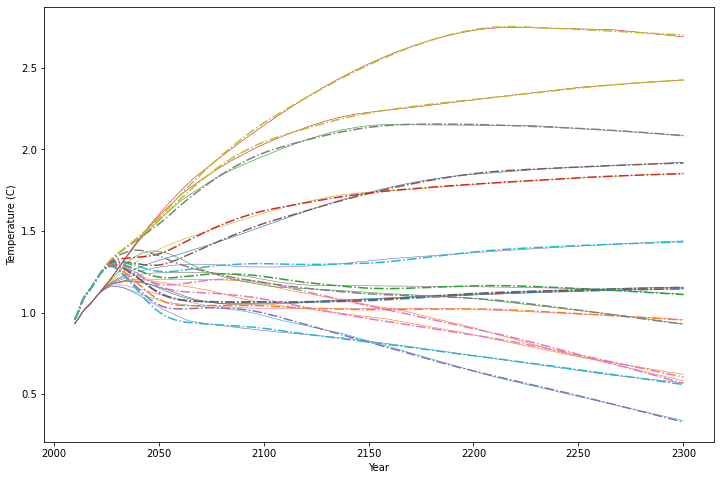

In [28]:
plt.figure(figsize=(12, 8))
ax = plt.subplot()
plt.plot(
    [int(x) for x in temp_test[true_quant].iloc[:15, 1:].columns], 
    temp_test[0.1].iloc[:15, 1:].T,
    linewidth=0.6
)
plt.plot(
    [int(x) for x in temp_test[true_quant].iloc[:15, 1:].columns],
    decomposers5[0.5].inverse_transform(
        decomposers5[0.5].transform(temp_test[0.1].iloc[:15, 1:])
    ).T,
    linestyle="-.",
)
plt.xlabel("Year")
plt.ylabel("Temperature (C)")

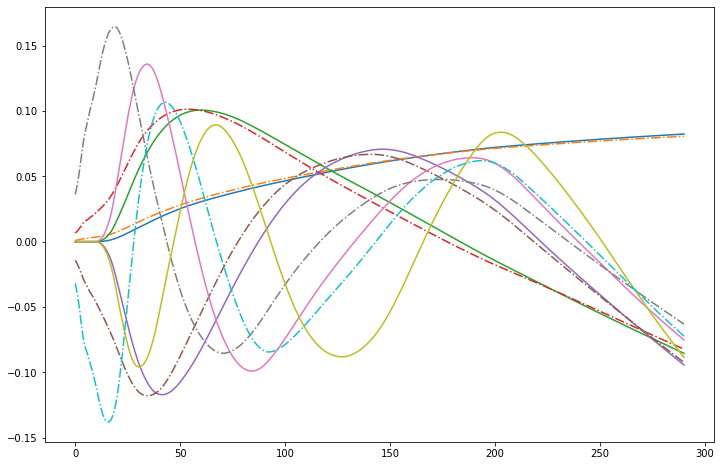

In [29]:
plt.figure(figsize=(12, 8))
ax = plt.subplot()
for i in range(5):
    plt.plot(
        decomposers5[0.1].components_[i]
    )
    plt.plot(
        decomposers5["all"].components_[i],
        linestyle="-.",
    )

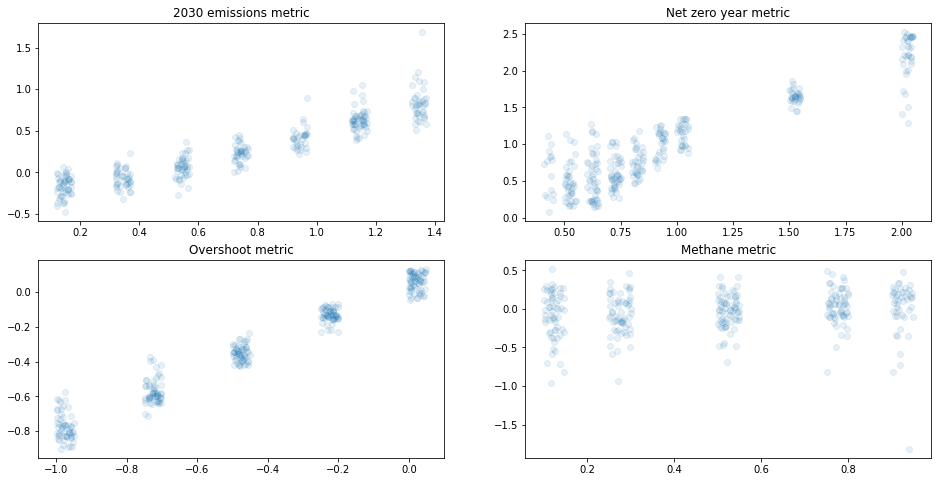

In [30]:
plt.figure(figsize=(16, 8))
corcoefsq5 = []
titles = ["2030 emissions metric", "Net zero year metric", "Overshoot metric", "Methane metric"]
for i in range(4):
    ax=plt.subplot(2, 2, i+1)
    plt.scatter(
        temp_res_test[quant_to_inv].iloc[:, i]+0.05*np.random.rand(len(wrong_quant_results)), 
        wrong_quant_results[:, i], alpha=0.1
    )
    plt.title(titles[i])
    #corcoefsq5.append(np.corrcoef(temp_res_test.iloc[:, i], wrong_quant_results[:, i]))
#corcoefsq5

In [31]:
(all_wrong_fraction, wrong_fraction) = calc_wrong_fraction(wrong_quant_results)
print(all_wrong_fraction)
print(wrong_fraction)

0.58
0    0.180000
1    0.076667
2    0.060000
3    0.500000
dtype: float64


In [32]:
# We can apply this to all other real quantiles too. 
false_quant = quant_to_inv
all_wrong = temps.loc[temps["quantile"]!=false_quant,:].copy()
assert true_quant != false_quant
wrong_quant_pcas = decomposers5[false_quant].transform(all_wrong.iloc[:, 7:-6])
wrong_quant_pcas = np.c_[wrong_quant_pcas, false_quant * np.ones((len(wrong_quant_pcas), 1))]
wrong_quant_results = poly_model.predict(poly_2.fit_transform(wrong_quant_pcas))

C:\Users\rlamboll\Anaconda3\envs\silicone-1\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [33]:
wrong_quant_pcas

array([[-18.15930131,  -1.57411046,   0.87144876,  -0.31366426,
         -0.10247882,   0.5       ],
       [-17.67721653,  -1.41619878,   0.80008963,  -0.29771371,
         -0.07748972,   0.5       ],
       [-17.09076606,  -1.25781281,   0.77247705,  -0.29535283,
         -0.04812241,   0.5       ],
       ...,
       [ 33.27737479,   0.2597444 ,  -1.10944097,  -0.06371946,
          0.10398804,   0.5       ],
       [ 34.54493314,   0.46271646,  -1.15773275,  -0.11460294,
          0.05306234,   0.5       ],
       [ 36.21125225,   0.61380144,  -1.18693849,  -0.1412202 ,
          0.04538028,   0.5       ]])

In [34]:
(all_wrong_fraction, wrong_fraction) = calc_wrong_fraction(wrong_quant_results)
print(all_wrong_fraction)
print(wrong_fraction)

0.45366666666666666
0    0.136500
1    0.026500
2    0.129833
3    0.373500
dtype: float64


In [35]:
wrong_quant_res_df = pd.DataFrame(columns=functional_cols, data=wrong_quant_results)

In [36]:
wrong_quant_res_df["net_zero"] = wrong_quant_res_df["nzreduced"] *100 + 2000
wrong_quant_res_df["overshoot"] = wrong_quant_res_df["overshootreduced"] * 10000
wrong_quant_res_df

,factor2030,nzreduced,overshootreduced,methane,net_zero,overshoot
0,-0.429195,0.483648,-0.586955,-0.023846,2048.364812,-5869.546225
1,-0.371725,0.392936,-0.603713,0.035887,2039.293606,-6037.127177
2,-0.326212,0.372337,-0.628333,0.085122,2037.233706,-6283.334230
3,-0.201935,0.302137,-0.681910,0.143944,2030.213737,-6819.099402
4,-0.104112,0.389433,-0.663642,0.134201,2038.943327,-6636.419940
...,...,...,...,...,...,...
5995,1.663481,1.362066,0.635016,1.302707,2136.206618,6350.163762
5996,1.681752,1.298006,0.657111,1.523409,2129.800623,6571.112240
5997,1.944835,1.208009,0.735761,1.193817,2120.800935,7357.605568
5998,2.288812,1.152201,0.818001,0.558951,2115.220107,8180.011701


In [53]:
wrong_quant_res_df["reg_methane"] = [min(1, max(0, x)) for x in wrong_quant_res_df["methane"]]
wrong_quant_res_df["reg_nz"] = [min(2300, max(2030, x)) for x in wrong_quant_res_df["net_zero"]]
wrong_quant_res_df["reg_factor2030"] = [max(0, x) for x in wrong_quant_res_df["factor2030"]]
wrong_quant_res_df

,factor2030,nzreduced,overshootreduced,methane,net_zero,overshoot,reg_methane,reg_nz,reg_factor2030
0,-0.429195,0.483648,-0.586955,-0.023846,2048.364812,-5869.546225,0.000000,2048.364812,0.000000
1,-0.371725,0.392936,-0.603713,0.035887,2039.293606,-6037.127177,0.035887,2039.293606,0.000000
2,-0.326212,0.372337,-0.628333,0.085122,2037.233706,-6283.334230,0.085122,2037.233706,0.000000
3,-0.201935,0.302137,-0.681910,0.143944,2030.213737,-6819.099402,0.143944,2030.213737,0.000000
4,-0.104112,0.389433,-0.663642,0.134201,2038.943327,-6636.419940,0.134201,2038.943327,0.000000
...,...,...,...,...,...,...,...,...,...
5995,1.663481,1.362066,0.635016,1.302707,2136.206618,6350.163762,1.000000,2136.206618,1.663481
5996,1.681752,1.298006,0.657111,1.523409,2129.800623,6571.112240,1.000000,2129.800623,1.681752
5997,1.944835,1.208009,0.735761,1.193817,2120.800935,7357.605568,1.000000,2120.800935,1.944835
5998,2.288812,1.152201,0.818001,0.558951,2115.220107,8180.011701,0.558951,2115.220107,2.288812


In [52]:
# Save the data to be reprocessed and see how good the matches are
wrong_quant_res_df.to_csv(output_dir + "InfilledFromPCAOfWrongQuantile.csv")
temp_test[false_quant].to_csv(output_dir + "OriginalPathwayQuantile.csv")

In [55]:
cases = []
for _, item in wrong_quant_res_df.iterrows():
    cases.append((item["reg_factor2030"], item["reg_nz"], item["overshoot"], item["reg_methane"]))

In [59]:
# Generate the full set of data for these scenarios too
scripts.generate_systematic_paths.make_paths(
    cases,
    outdir=output_dir + "reversed/", 
    version=version_str, 
    check_min_dif=True, make_scen_files=False
)

pyam.core - INFO: Reading file ..\input\sr15_cleaned_harmed.csv
pyam.core - INFO: Reading file ..\input\complete_sr15_emissions.csv


TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [ ]:
wrong_quant_res_df["net_zero"].drop_duplicates()

In [ ]:
# Also save the scen files. 
scen_output = output_dir + "reversed_scens/scen_{}"
os.makedirs(scen_output, exist_ok=True)
for scen in wrong_quant_res_df.scenario:
    scripts.utils.construct_scen_file(wrong_quant_res_df.filter(scenario=scen))

In [ ]:
wrong_quant_res_df

# Attempt to find closest match in original dataset

In [ ]:
nbhrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(temp_train[false_quant].iloc[:, 21:])

In [ ]:
closest = {}
for quant in [q for q in quantiles if q != false_quant]:
    _, closind = nbhrs.kneighbors(temp_test[quant].iloc[:, 21:])
    closest[quant] = temp_train[false_quant].iloc[closind.squeeze(), :]

In [ ]:
plt.figure(figsize=(13, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot([int(x) for x in closest[quant].columns[1:]], closest[quant].iloc[i, 1:])
    plt.plot([int(x) for x in closest[quant].columns[1:]], temp_test[quant].iloc[i, 1:])

In [ ]:
plt.figure(figsize=(13, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot([int(x) for x in closest[quant].columns[1:]], closest[0.66].iloc[i, 1:])
    plt.plot([int(x) for x in closest[quant].columns[1:]], temp_test[0.66].iloc[i, 1:])

In [ ]:
plt.figure(figsize=(13, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot([int(x) for x in closest[quant].columns[1:]], closest[0.66].iloc[i, 1:])
    plt.plot([int(x) for x in closest[quant].columns[1:]], temp_test[0.66].iloc[i, 1:])

In [ ]:
plt.figure(figsize=(13, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot([int(x) for x in closest[0.33].columns[1:]], closest[0.1].iloc[i, 1:])
    plt.plot([int(x) for x in closest[0.33].columns[1:]], temp_test[0.1].iloc[i, 1:])

# Investigate relative behaviour of quantiles

In [ ]:
temp_offset = temps_10 - temps_50

In [ ]:
plt.scatter(temps_50[2050], temps_66[2050])

In [ ]:
plt.scatter(temps_50[2050], temps_90[2050])

In [ ]:
plt.scatter(temps_50[2050], temp_offset[2050])

In [ ]:
plt.scatter(temps_50.loc[:, 2030], temps_90.loc[:, 2030])

In [ ]:
? np.polyfit

In [ ]:
m, b = np.polyfit(np.reshape(temps_50.loc[:, 2020:2100].values, -1), np.reshape(temps_66.loc[:, 2020:2100].values, -1), 1)
print(m, b)
plt.scatter(temps_50.loc[:, 2020:2100], temps_66.loc[:, 2020:2100])
x = np.arange(1, 3.1)
plt.plot(x, b + m * x, '-', color="red")

In [ ]:
for quant in [0.1, 0.33, 0.66, 0.9]:
    m, b = np.polyfit(np.reshape(temps_50.loc[:, 2030:2100].values, -1), np.reshape(temp_data[quant].loc[:, 2030:2100].values, -1), 1)
    print(m, b)
    plt.scatter(temps_50.loc[:, 2030:2100], temp_data[quant].loc[:, 2030:2100])
    x = np.arange(1, 2.8, 0.1)
    plt.plot(x, b + m * x, '-', color="black")